In [3]:
import pandas as pd
%matplotlib inline

Lets import medical_care data:

In [8]:
medical = pd.read_csv("data/medical_care.csv")
print(medical.shape)
medical.info()

(35072, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35072 entries, 0 to 35071
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UMARSTAT  35072 non-null  object 
 1   UCUREMP   35072 non-null  object 
 2   UCURNINS  35072 non-null  object 
 3   USATMED   35072 non-null  object 
 4   URELATE   35072 non-null  int64  
 5   REGION    35072 non-null  object 
 6   STATE     35072 non-null  object 
 7   HHID      35072 non-null  int64  
 8   FHOSP     35072 non-null  object 
 9   FDENT     35072 non-null  int64  
 10  FEMER     35072 non-null  int64  
 11  FDOCT     35072 non-null  int64  
 12  UIMMSTAT  35072 non-null  object 
 13  U_USBORN  35072 non-null  object 
 14  UAGE      35072 non-null  int64  
 15  U_FTPT    35072 non-null  object 
 16  U_WKSLY   35072 non-null  float64
 17  U_HRSLY   35072 non-null  int64  
 18  U_USHRS   35072 non-null  int64  
 19  HEARNVAL  35072 non-null  int64  
 20  HOTHVAL   35072 

The file includes socio-demographic data, including health insurance and various aspects of health care touchpoints for the respondent group of a survey conducted in the USA.

The collection includes 35072 observations and 27 variables:
 
* UMARSTAT – Marital status recode
* UCUREMP – Currently has employer coverage
* UCURNINS – Currently uninsured
* USATMED – Satisfied with quality of medical care
* URELATE – Number of relatives in household
* REGION – region
* STATE - state
* HHID – Household identification number
* FHOSP – In hospital overnight last year
* FDENT – Dental visits last year
* FEMER – Number of emergency room visits last year
* FDOCT – Number of doctor visits last year
* UIMMSTAT – Immigration status
* U_USBORN – U.S.- or foreign-born
* UAGE – Age topcoded
* U_FTPT – Full-time or part-time worker this year
* U_WKSLY – Weeks worked last year
* U_HRSLY – Hours worked per week last year
* U_USHRS – Hours worked per week this year
* HEARNVAL – Earnings amount last year - Household
* HOTHVAL – Household income, total exc. earnings
* HRETVAL – Retirement amount – Household
* HSSVAL – Social Security amount - Household
* HWSVAL – Wages and salaries amount – Household
* UBRACE – race
* GENDER – gender
* UEDUC3 – education level
* CEYES - color of eyes
* CHAIR - color of hair

Lets see how the datasets looks like:

In [7]:
# Increade max number of columns to display for this dataset.
pd.set_option("display.max_columns",50)
medical.head()

,UMARSTAT,UCUREMP,UCURNINS,USATMED,URELATE,REGION,STATE,HHID,FHOSP,FDENT,FEMER,FDOCT,UIMMSTAT,U_USBORN,UAGE,U_FTPT,U_WKSLY,U_HRSLY,U_USHRS,HEARNVAL,HOTHVAL,HRETVAL,HSSVAL,HWSVAL,UBRACE,GENDER,UEDUC3,CEYES,CHAIR
0,Never married,No,Yes,Very satisfied,2,Midwest,WI,55616128,No,0,0,0,US-born citizen,Yes,22,Full-time,52.0,40,40,0,0,0,0,0,White,Female,No HS diploma or GED,hazel,brown
1,Separated,Yes,No,Very satisfied,2,Midwest,WI,54704000,No,2,0,0,US-born citizen,Yes,30,Full-time,52.0,40,40,31468,5950,0,0,31468,White,Female,"HS diploma or GED, no bachelor's degree",blue,black
2,Married_live together,No,No,Very satisfied,5,Midwest,WI,57874272,No,0,1,0,US-born citizen,Yes,33,Part-time,52.0,30,30,24700,11340,0,4920,24700,White,Male,No HS diploma or GED,brown,brown
3,Divorced,No,Yes,Little dissatisfied,4,Midwest,WI,54106816,No,0,0,1,US-born citizen,Yes,41,Part-time,43.0,40,25,60000,39002,0,0,60000,Black,Female,No HS diploma or GED,brown,black
4,Never married,Yes,No,Very satisfied,0,Midwest,WI,54569152,No,2,0,0,US-born citizen,Yes,34,Full-time,52.0,40,40,55280,4200,0,0,55280,Black,Male,"HS diploma or GED, no bachelor's degree",brown,black


Lets see what are datatypes for all the variables.

It looks as if we made one mistake. HHID is an identification number. Therefore we should import is as a string and not as an int. Importing IDs as ints can be risky as leading zeros get trancuated at reading. All other qualitative variables are already typed as object.

In [11]:
medical.REGION.unique()

array(['Midwest', 'Northeast', 'West', 'South'], dtype=object)

**Note**
If type of column is string, we should encode to number value

+ Midwest => 1
+ Northeast => 2
+ West => 3
+ South => 4

In [12]:
medical.REGION.value_counts()

Midwest      11250
South         8802
West          7877
Northeast     7143
Name: REGION, dtype: int64

In [4]:
medical.dtypes

UMARSTAT     object
UCUREMP      object
UCURNINS     object
USATMED      object
URELATE       int64
REGION       object
STATE        object
HHID          int64
FHOSP        object
FDENT         int64
FEMER         int64
FDOCT         int64
UIMMSTAT     object
U_USBORN     object
UAGE          int64
U_FTPT       object
U_WKSLY     float64
U_HRSLY       int64
U_USHRS       int64
HEARNVAL      int64
HOTHVAL       int64
HRETVAL       int64
HSSVAL        int64
HWSVAL        int64
UBRACE       object
GENDER       object
UEDUC3       object
CEYES        object
CHAIR        object
dtype: object

Reloading medical dataset with predefined set for HHID as str.

In [13]:
medical = pd.read_csv("data/medical_care.csv", dtype={"HHID":str})
medical.dtypes

# Lưu ý: ví dụ time-zone giữa các nước khác nhau.

UMARSTAT     object
UCUREMP      object
UCURNINS     object
USATMED      object
URELATE       int64
REGION       object
STATE        object
HHID         object
FHOSP        object
FDENT         int64
FEMER         int64
FDOCT         int64
UIMMSTAT     object
U_USBORN     object
UAGE          int64
U_FTPT       object
U_WKSLY     float64
U_HRSLY       int64
U_USHRS       int64
HEARNVAL      int64
HOTHVAL       int64
HRETVAL       int64
HSSVAL        int64
HWSVAL        int64
UBRACE       object
GENDER       object
UEDUC3       object
CEYES        object
CHAIR        object
dtype: object

Some variables are not numeric but qualitative. in some cases they are nominal (for example REGION) and in other ordinal (USATMED). Depending on the library and algorithm we may need to transform those variables.

We may need to:
* create ordered numerical labels
* unordered numerical labels
* do one hot encoding (binarization)

There are many ways to do all abovementioned actions. Lets see some examples starting with USATMED. We see that there are 5 unique levels. We can create a dictionary to map the variable.

In [14]:
print(medical.USATMED.unique())
print(medical.USATMED.value_counts())

['Very satisfied' 'Little dissatisfied' 'Little satisfied' 'No opinion'
 'Very dissatisfied']
Very satisfied         18002
Little satisfied       12636
Little dissatisfied     2470
Very dissatisfied       1091
No opinion               873
Name: USATMED, dtype: int64


In [16]:
satDict = {'Very satisfied':4,  'Little satisfied':3,
       'No opinion':2,'Little dissatisfied':1, 'Very dissatisfied':0}

In [18]:
medical["USATMED"]=medical.USATMED.map(satDict)
print(medical.USATMED.unique())
print(medical.USATMED.value_counts())

[nan]
Series([], Name: USATMED, dtype: int64)


Lets do the same with education

In [19]:
print(medical.UEDUC3.unique())
print(medical.UEDUC3.value_counts())
eduDict = {'No HS diploma or GED':0, "HS diploma or GED, no bachelor's degree":1,
 "Bachelor's degree and higher":2}
medical["UEDUC3"]=medical.UEDUC3.map(eduDict)
print(medical.UEDUC3.unique())
print(medical.UEDUC3.value_counts())

['No HS diploma or GED' "HS diploma or GED, no bachelor's degree"
 "Bachelor's degree and higher"]
HS diploma or GED, no bachelor's degree    20896
Bachelor's degree and higher               10322
No HS diploma or GED                        3854
Name: UEDUC3, dtype: int64
[0 1 2]
1    20896
2    10322
0     3854
Name: UEDUC3, dtype: int64


Lets change the type of the U_WKSLY to int.

In [20]:
medical["U_WKSLY"]=medical["U_WKSLY"].astype(int)

Lets look at our data set. It look as if there are errors in HEARNVAL and HOTHVAL as we should not be seing negative values there.

In [21]:
medical.describe()

,USATMED,URELATE,FDENT,FEMER,FDOCT,UAGE,U_WKSLY,U_HRSLY,U_USHRS,HEARNVAL,HOTHVAL,HRETVAL,HSSVAL,HWSVAL,UEDUC3
count,0.0,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000,35072.000000
mean,NaN,2.288692,1.567262,0.331261,2.461280,39.435618,47.099510,41.270301,41.634552,39688.031621,7504.163321,1352.392935,2321.060761,37134.580748,1.184421
std,NaN,1.520769,1.508148,0.795926,3.666897,11.302693,9.844522,13.153918,13.295147,57282.357668,16661.686112,6666.099716,5722.053708,54558.125077,0.608438
min,NaN,0.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000,1.000000,-19998.000000,-16902.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,31.000000,48.000000,38.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,2.000000,1.000000,0.000000,1.000000,40.000000,52.000000,40.000000,40.000000,24000.000000,485.000000,0.000000,0.000000,21000.000000,1.000000
75%,NaN,3.000000,2.000000,0.000000,3.000000,47.000000,52.000000,48.000000,50.000000,60000.000000,8424.000000,0.000000,0.000000,56000.000000,2.000000
max,NaN,14.000000,8.000000,5.000000,25.000000,82.000000,52.000000,126.000000,126.000000,687064.000000,315335.000000,149402.000000,100000.000000,687064.000000,2.000000


Lets look closer at those variables.

In [23]:
medical.kurtosis()

C:\Users\Windows\AppData\Local\Temp\ipykernel_6120\1372606454.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medical.kurtosis()


USATMED           NaN
URELATE      1.057966
HHID        -1.200590
FDENT        3.688462
FEMER       12.760489
FDOCT       14.425000
UAGE        -0.642596
U_WKSLY      5.388126
U_HRSLY      2.758919
U_USHRS      2.739513
HEARNVAL    19.307134
HOTHVAL     42.440855
HRETVAL     81.146845
HSSVAL      18.779646
HWSVAL      19.954215
UEDUC3      -0.466537
dtype: float64

(64, 29)


<AxesSubplot:>

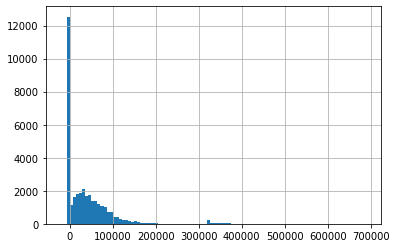

In [25]:
print(medical.query("HEARNVAL<0").shape)
medical.HEARNVAL.hist(bins=100)

(180, 29)


<AxesSubplot:>

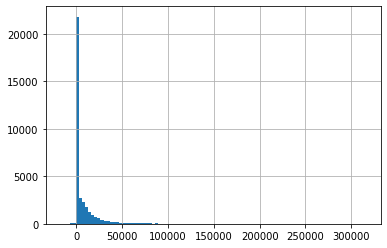

In [26]:
print(medical.query("HOTHVAL<0").shape)
medical.HOTHVAL.hist(bins=100)

It looks as if the problem is not profund. We can replace negative values with zero in these variables.

In [27]:
medical.loc[medical.HEARNVAL<0, "HEARNVAL"]=0
medical.loc[medical.HOTHVAL<0, "HOTHVAL"]=0

Lets look ath the number of relatives in the house hold. It looks as if there are vew cases where the value is greater than 5. Lets change those outliers to our new max of 5.

In [28]:
medical.URELATE.value_counts()

3     9084
2     7700
1     7399
0     4291
4     4194
5     1561
6      508
7      193
8       86
9       30
10      16
11       6
14       3
12       1
Name: URELATE, dtype: int64

In [30]:
medical.loc[medical.URELATE>5, "URELATE"]=5
medical.URELATE.value_counts()

3    9084
2    7700
1    7399
0    4291
4    4194
5    2404
Name: URELATE, dtype: int64

Finally we can save our data set in a binary format so that we save all the changes we have made and keep the information about the types.

In [31]:
medical.to_pickle("data/medical.p")

### Exercise 1.1.
import data from the 'titanic.csv' file and check its structure.
* passenger_id – Unique passenger id
* pclass – Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* survived – Survival (0 = No, 1 = Yes)
* name – Name and SUrname
* sex – Sex (0 = Male, 1 = Female)
* age – Age in years
* sibsp – # of siblings / spouses aboard the Titanic
* parch – # of parents / children aboard the Titanic
* ticket – Ticket number
* fare – Passenger fare
* cabin – Cabin number
* embarked – Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* boat – Lifeboat (if survived)
* body – Body number (if did not survive and body was recovered)
* home.dest – Home/Destination

In [4]:
import pandas as pd
titanic = pd.read_csv("data/titanic.csv")
titanic.info()

# Check structure of data
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1309 non-null   int64  
 1   pclass        1309 non-null   int64  
 2   survived      1309 non-null   int64  
 3   name          1309 non-null   object 
 4   sex           1309 non-null   int64  
 5   age           1046 non-null   float64
 6   sibsp         1309 non-null   int64  
 7   parch         1309 non-null   int64  
 8   ticket        1309 non-null   object 
 9   fare          1308 non-null   float64
 10  cabin         295 non-null    object 
 11  embarked      1307 non-null   object 
 12  boat          486 non-null    object 
 13  body          121 non-null    float64
 14  home.dest     745 non-null    object 
dtypes: float64(3), int64(6), object(6)
memory usage: 153.5+ KB


,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Exercise 1.2
In the titanic dataset convert columns with qualitative variables
to factors (sex, embarked, survived) or ordered factor (pclass) -
defining the appropriate levels and, if needed, order of values.
Please code the levels as:
- embarked respectively: Cherbourg, Queenstown, Southampton
- sex - Female, Male
- survived - Yes, No
- pclass - 1st <2nd <3rd

In [5]:
embarked_map = {'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'}
titanic['embarked'] = titanic['embarked'].map(embarked_map)
titanic['embarked'].value_counts()

sex_map = {0 : 'Male', 1 : 'Female'}
titanic['sex'] = titanic['sex'].map(sex_map)
titanic['sex'].value_counts()   

survived_map = {0 : 'No', 1 : 'Yes'}
titanic['survived'] = titanic['survived'].map(survived_map)
titanic['survived'].value_counts()

pclass_map = {1 : '1st', 2 : '2nd', 3 : '3rd'}
titanic['pclass'] = titanic['pclass'].map(pclass_map)
titanic['pclass'].value_counts()

pclass
3rd    709
1st    323
2nd    277
Name: count, dtype: int64

In [13]:
titanic.dtypes

passenger_id      int64
pclass           object
survived         object
name             object
sex              object
age             float64
sibsp             int64
parch             int64
ticket           object
fare            float64
cabin            object
embarked         object
boat             object
body            float64
home.dest        object
dtype: object

READ: https://vimentor.com/en/lesson/tien-xu-ly-du-lieu-trong-linh-vuc-hoc-may-phan-1